<a href="https://colab.research.google.com/github/AlyssaPh/-MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20. Numerical Differentiation**

**20.1 Numerical Differentiation Problem Statement**

In [1]:
import numpy as np

# Define the size of the grid
rows = 5
cols = 5

# Create a 2D grid with zeros
grid = np.zeros((rows, cols))

# Fill the grid with some values (e.g., row and column indices)
for i in range(rows):
    for j in range(cols):
        grid[i, j] = i + j  # Example: sum of row and column indices

# Print the grid
print("Numerical Grid:")
print(grid)

# Accessing specific elements
print("\nElement at row 2, column 3:", grid[2, 3])

# Performing operations on the grid
# Example: Calculate the sum of all elements in the grid
grid_sum = np.sum(grid)
print("\nSum of all elements in the grid:", grid_sum)

# Example: Calculate the mean of all elements in the grid
grid_mean = np.mean(grid)
print("Mean of all elements in the grid:", grid_mean)

# Example: Calculate the standard deviation of all elements in the grid
grid_std = np.std(grid)
print("Standard deviation of all elements in the grid:", grid_std)

Numerical Grid:
[[0. 1. 2. 3. 4.]
 [1. 2. 3. 4. 5.]
 [2. 3. 4. 5. 6.]
 [3. 4. 5. 6. 7.]
 [4. 5. 6. 7. 8.]]

Element at row 2, column 3: 5.0

Sum of all elements in the grid: 100.0
Mean of all elements in the grid: 4.0
Standard deviation of all elements in the grid: 2.0


**20.2 Finite Difference Approximating Derivatives**

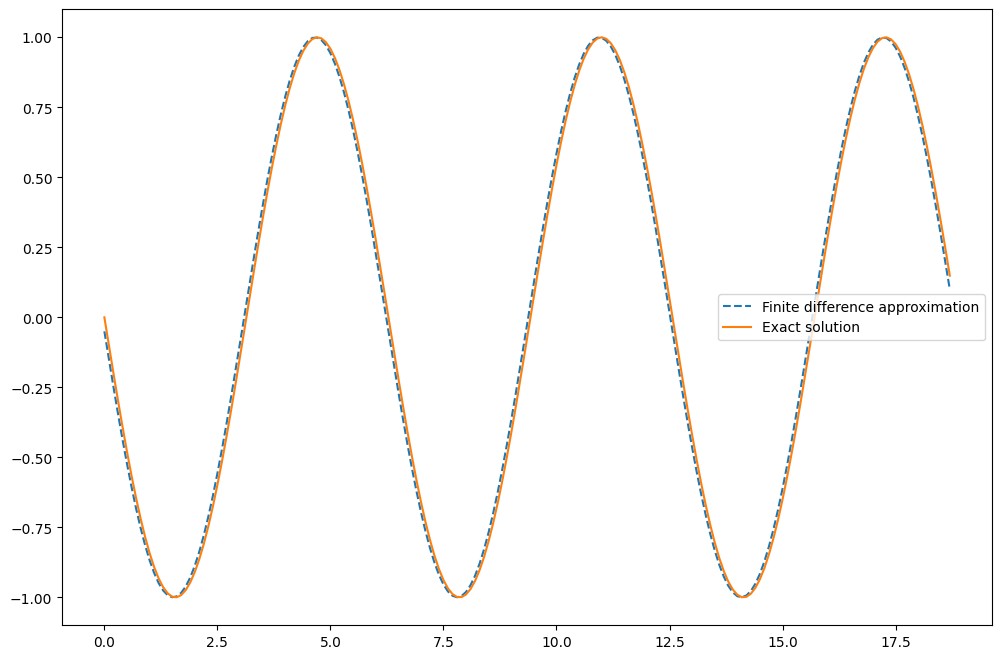

0.049984407218554114


In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# step size
h = 0.1
# define grid
x = np.arange(0, 6*np.pi, h)
# compute function
y = np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = -np.sin(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

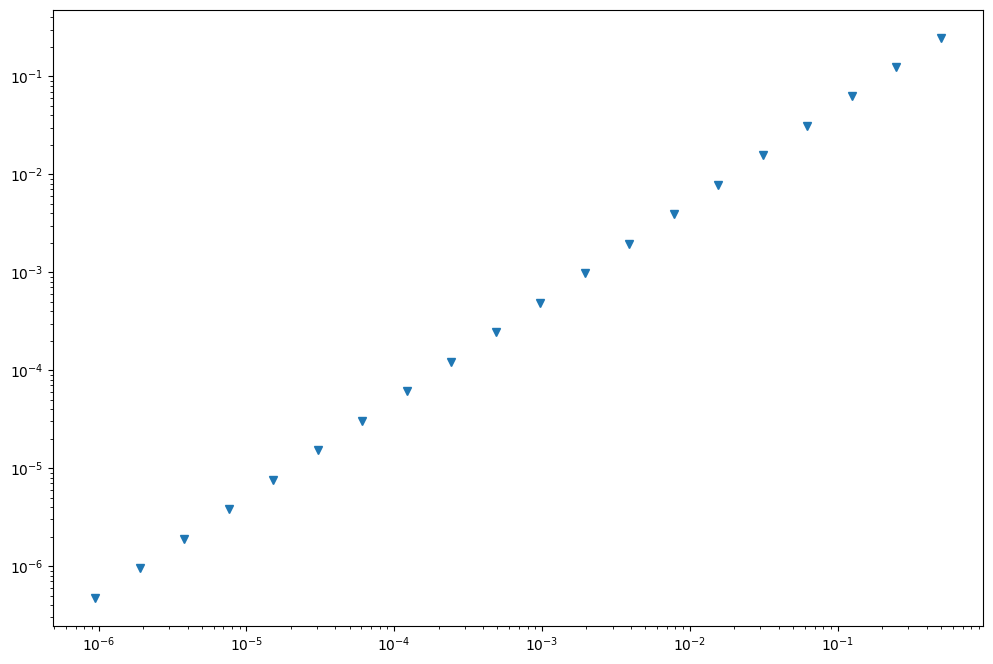

In [6]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []

for i in range(iterations):
    # halve the step size
    h /= 2
    # store this step size
    step_size.append(h)
    # compute new grid
    x = np.arange(0, 6 * np.pi, h)
    # compute function value at grid
    y = np.cos(x)
    # compute vector of forward differences
    forward_diff = np.diff(y)/h
    # compute corresponding grid
    x_diff = x[:-1]
    # compute exact solution
    exact_solution = -np.sin(x_diff)

    # Compute max error between
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

**20.3 Approximating of Higher Order Derivatives**

In [7]:
import numpy as np

# Define the function for which you want to calculate the derivative
def f(x):
    return np.sin(x)  # Example function: sin(x)

# Function to compute the second derivative using the Taylor series approximation
def second_derivative(f, x, h=1e-5):
    """
    Compute the second derivative of f at x using the central difference method.

    Parameters:
        f: The function to differentiate.
        x: The point at which to compute the derivative.
        h: Step size (default is 1e-5).

    Returns:
        The approximate second derivative of f at x.
    """
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h ** 2)

# Example usage
x = np.pi / 4  # Point at which to compute the second derivative
h = 1e-5       # Step size

# Compute the second derivative
d2f_dx2 = second_derivative(f, x, h)

# Analytical second derivative of sin(x) is -sin(x)
analytical_d2f_dx2 = -np.sin(x)

# Print results
print(f"Numerical second derivative at x = {x}: {d2f_dx2}")
print(f"Analytical second derivative at x = {x}: {analytical_d2f_dx2}")
print(f"Error: {abs(d2f_dx2 - analytical_d2f_dx2)}")

Numerical second derivative at x = 0.7853981633974483: -0.7071054852758606
Analytical second derivative at x = 0.7853981633974483: -0.7071067811865475
Error: 1.2959106868715153e-06


**20.4 Numerical Differentiation with Noise**

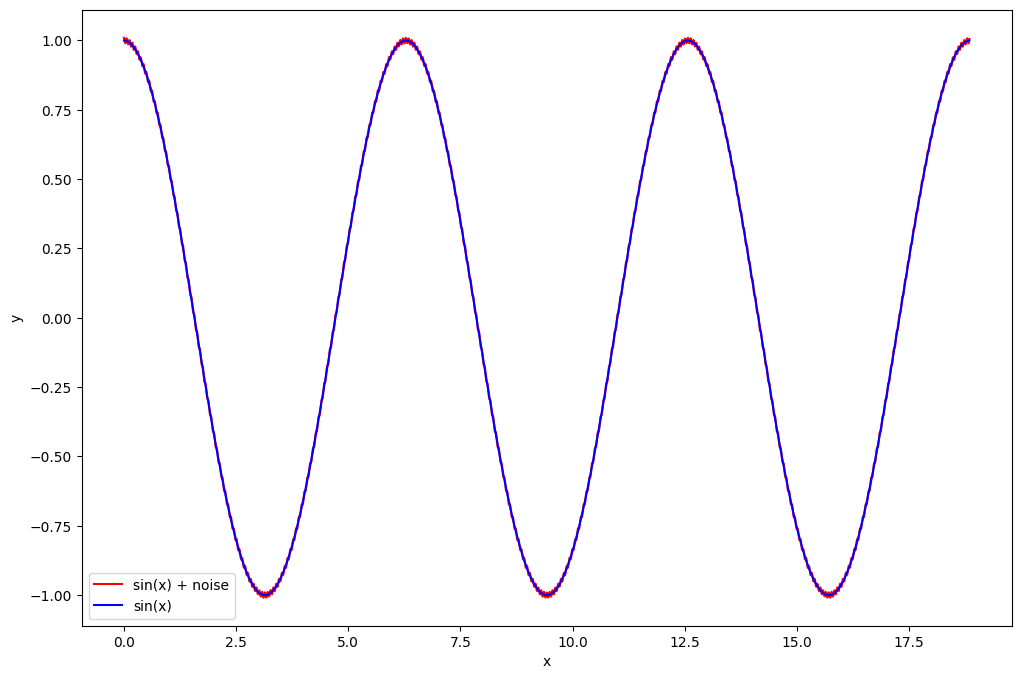

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
x = np.arange(0, 6*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'sin(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'sin(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

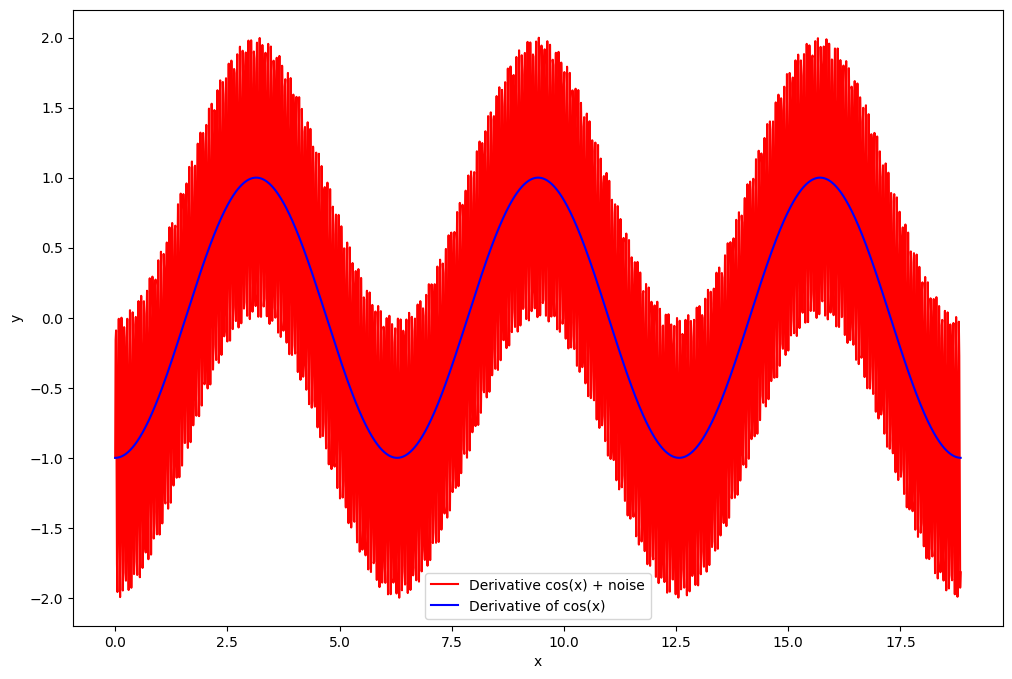

In [9]:
x = np.arange(0, 6*np.pi, 0.01)
# compute function
y = -np.cos(x)
y_noise = y + epsilon*omega*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()